<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Module_Temperature_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/Module Temprature Report.xlsx'
excel_data = pd.ExcelFile(file_path)

In [4]:
df = pd.read_excel(file_path, header=None)  # Load without assigning headers
print("Preview of Raw Data:")
print(df.head(10))

Preview of Raw Data:
                                                   0       1       2  \
0  300 MW SOLAR PLANT,AVAADA SUNRISE ENERGY PVT L...     NaN     NaN   
1                                                NaN     NaN     NaN   
2                                         Time Stamp    ICR1    ICR5   
3                                                NaN  Degree  Degree   
4                                2024-04-24 00:00:01      23       0   
5                                2024-04-24 00:01:01      23       0   
6                                2024-04-24 00:02:01      23       0   
7                                2024-04-24 00:03:01      23       0   
8                                2024-04-24 00:04:01      23       0   
9                                2024-04-24 00:05:01      22       0   

          3         4         5         6         7         8  
0       NaN       NaN       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN       NaN       

In [5]:
# Reload with appropriate header row (after identifying the correct row)
df = pd.read_excel(file_path, header=4)  # Adjust the header index as needed
print("Initial Shape of the Dataset:", df.shape)


Initial Shape of the Dataset: (1439, 9)


In [6]:
# Drop completely empty rows and columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

In [7]:
# Handle rows/columns with significant missing values
df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)  # Drop rows with >50% missing
df = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)  # Drop columns with >50% missing

In [11]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

# Remove "Unnamed" columns if present
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
print("Final Shape of the cleaned Dataset:", df.shape)

Final Shape of the cleaned Dataset: (1439, 9)


In [12]:
# Save the cleaned dataset
output_path = '/content/Module_Report.xlsx'
df.to_excel(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: /content/Module_Report.xlsx


In [13]:
# Step 2: Basic Data Exploration
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for remaining missing values
print("\nMissing Values in Cleaned Dataset:")
print(df.isnull().sum())


Summary Statistics:
                 2024-04-24 00:00:01           23       0     0.1  \
count                           1439  1439.000000  1439.0  1439.0   
mean   2024-04-24 12:00:01.013898496    35.931897     0.0     0.0   
min              2024-04-24 00:01:01    20.000000     0.0     0.0   
25%              2024-04-24 06:00:31    23.000000     0.0     0.0   
50%              2024-04-24 12:00:01    31.000000     0.0     0.0   
75%              2024-04-24 17:59:31    48.000000     0.0     0.0   
max              2024-04-24 23:59:01    65.000000     0.0     0.0   
std                              NaN    14.279578     0.0     0.0   

                28         23.1           25         25.1     0.2  
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.0  
mean     33.612926    36.433634    37.751216    37.260598     0.0  
min      25.000000    20.000000    22.000000    21.000000     0.0  
25%      27.000000    23.000000    25.000000    24.000000     0.0  
50%      32.00000

In [14]:
# Step 3: Time Series Analysis (if time-based data exists)
if 'period_end' in df.columns:
    df['period_end'] = pd.to_datetime(df['period_end'])  # Convert to datetime
    plt.figure(figsize=(12, 6))
    plt.plot(df['period_end'], df.iloc[:, 1:].sum(axis=1))  # Sum values across columns
    plt.title("Overall Trends Over Time")
    plt.xlabel("Time")
    plt.ylabel("Sum of Values")
    plt.grid(True)
    plt.show()

2024-04-24 00:00:01    int64
23                     int64
0                      int64
0.1                    int64
28                     int64
23.1                   int64
25                     int64
25.1                   int64
0.2                    int64
dtype: object
2024-04-24 00:00:01    int64
23                     int64
0                      int64
0.1                    int64
28                     int64
23.1                   int64
25                     int64
25.1                   int64
0.2                    int64
dtype: object
2024-04-24 00:00:01    int64
23                     int64
0                      int64
0.1                    int64
28                     int64
23.1                   int64
25                     int64
25.1                   int64
0.2                    int64
dtype: object
2024-04-24 00:00:01    int64
23                     int64
0                      int64
0.1                    int64
28                     int64
23.1                   int64
2

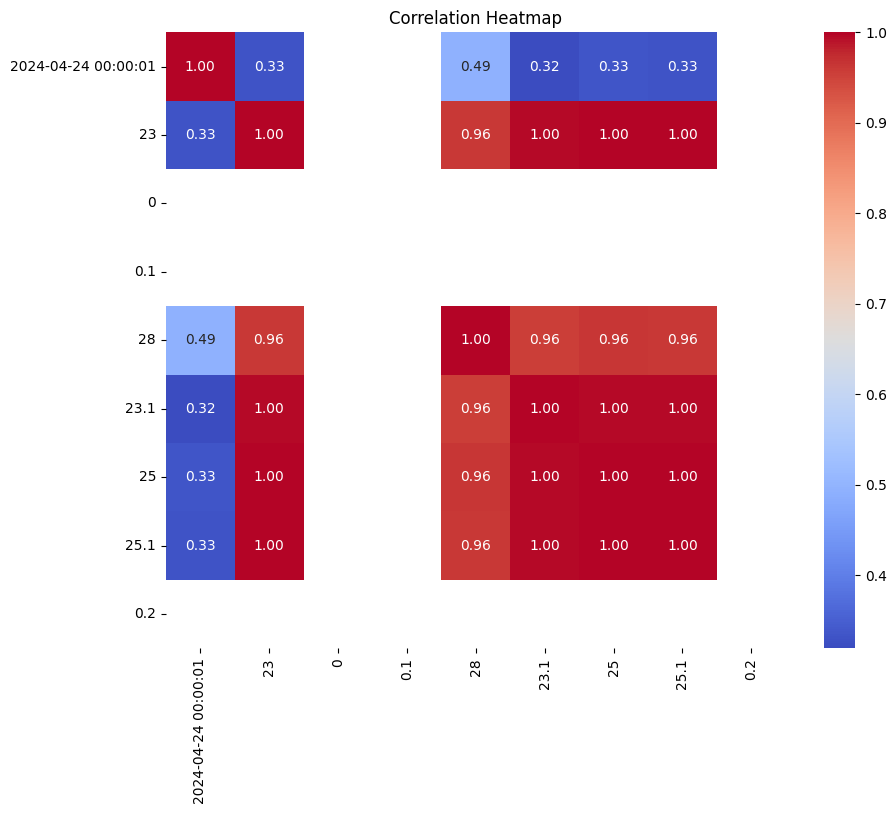

In [15]:
# print(df.dtypes)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df.fillna(0, inplace=True)  # Replace NaN with 0
    print(df.dtypes)
# Step 4: Correlation Analysis
# Calculate and display a heatmap of correlations
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
if not numeric_columns.empty:
    correlation_matrix = df[numeric_columns].corr()
    if not correlation_matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("\nNo correlations to display: Correlation matrix is empty.")
else:
    print("\nNo numeric columns available for correlation analysis.")

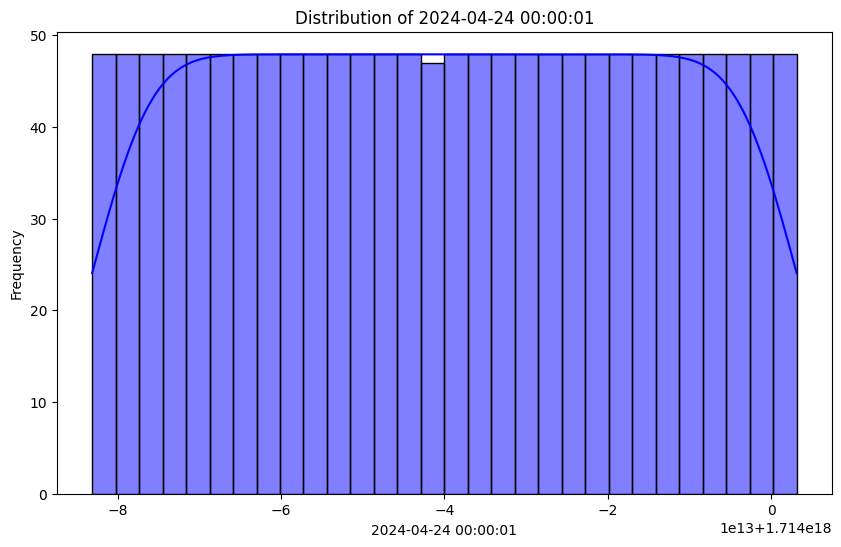

In [16]:
# Step 5: Distribution of Key Columns
# Visualize the distribution of the first numeric column (example)
if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numeric_columns[0]], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {numeric_columns[0]}")
    plt.xlabel(numeric_columns[0])
    plt.ylabel("Frequency")
    plt.show()

In [17]:
# Step 6: Aggregation (Group by Date or Other Categorical Variable)
if 'period_end' in df.columns:
    df['date'] = df['period_end'].dt.date  # Extract the date part
    daily_summary = df.groupby('date').sum(numeric_only=True)

    # Plot daily trends
    plt.figure(figsize=(12, 6))
    plt.plot(daily_summary.index, daily_summary.sum(axis=1))
    plt.title("Daily Trends")
    plt.xlabel("Date")
    plt.ylabel("Sum of Values")
    plt.grid(True)
    plt.show()

In [18]:
# Step 7: Anomaly Detection (Simple Threshold Method)
if not numeric_columns.empty:
    threshold = df[numeric_columns[0]].mean() + 3 * df[numeric_columns[0]].std()
    anomalies = df[df[numeric_columns[0]] > threshold]

    print("\nAnomalies Detected:")
    print(anomalies)

    # Save anomalies to an Excel file
    anomalies_output_path = '/content/anomalies.xlsx'
    anomalies.to_excel(anomalies_output_path, index=False)
    print(f"Anomalies saved to {anomalies_output_path}")


Anomalies Detected:
Empty DataFrame
Columns: [2024-04-24 00:00:01, 23, 0, 0.1, 28, 23.1, 25, 25.1, 0.2]
Index: []
Anomalies saved to /content/anomalies.xlsx


In [19]:
# Step 8: Save the Cleaned Dataset
cleaned_output_path = '/content/cleaned_dataset.xlsx'
df.to_excel(cleaned_output_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_output_path}")


Cleaned dataset saved to /content/cleaned_dataset.xlsx
